# Exploratory Data Analysis on Facebook Data
**Objective**: Implement EDA (Exploratory Data Analysis) on Pseudo Facebook Data

Description of Data given:

**userid**: numeric value unique to user

**age**: age of user

**dob_day**: day of user's date of birth

**dob_month**: month of user's date of birth

**dob_year**: year of user's date of birth

**gender**: gender of user male or female

**tenure**: number of days since user has been on Facebook

**friend_count**: number of friends user has

**friendships_initiated**: number of friendships initiated by user

**likes**: total number of posts liked by user

**likes_received**: total numbers of likes received by user's bost

**mobile_likes**: number of posts liked by user through mobile Facebook app

**mobile_likes_received**: number of posts received by user through mobile Facebook app

**www_likes**: number of posts liked by user through Facebook website

**www_likes_received**: number of likes by user through Facebook website

**Import required libraries**

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read in facebook_data.csv file and load into pandas dataframe**

In [2]:
facebook_data = pd.read_csv(r'facebook_data.csv')
facebook_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


**Number of rows and number of columns**

In [3]:
rows, columns = facebook_data.shape
print(f'Facebook dataframe has {rows} rows and {columns} columns')

Facebook dataframe has 99003 rows and 15 columns


**Summary of Facebook of data**

In [4]:
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


**Check for missing values and NA values**

In [5]:
facebook_data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [6]:
facebook_data.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

**Data cleaning and manipulation**

In [7]:
#dropping gender rows with missing values
facebook_data = facebook_data.dropna(axis = 0)
#filling NA values for tenure with mean
faceboo_data = facebook_data.fillna(facebook_data['tenure'].mean())

#reduced number of rows
rows, columns = facebook_data.shape
print(f'Facebook dataframe has {rows} rows and {columns} columns')

Facebook dataframe has 98826 rows and 15 columns


In [8]:
# time series index for date of birth
DOB = pd.to_datetime([f'{y}-{m}-{d}' for y, m , d in zip(facebook_data['dob_year'], facebook_data['dob_month'], facebook_data['dob_day'])])
facebook_data.index = DOB
#drop dob_year, dob_month, and dob_day since age is included in data set
facebook_data = facebook_data.drop(['dob_year', 'dob_month', 'dob_day'], axis = 1)
facebook_data.head()

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1999-11-19,2094382,14,male,266.0,0,0,0,0,0,0,0,0
1999-11-02,1192601,14,female,6.0,0,0,0,0,0,0,0,0
1999-11-16,2083884,14,male,13.0,0,0,0,0,0,0,0,0
1999-12-25,1203168,14,female,93.0,0,0,0,0,0,0,0,0
1999-12-04,1733186,14,male,82.0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='age', ylabel='count'>

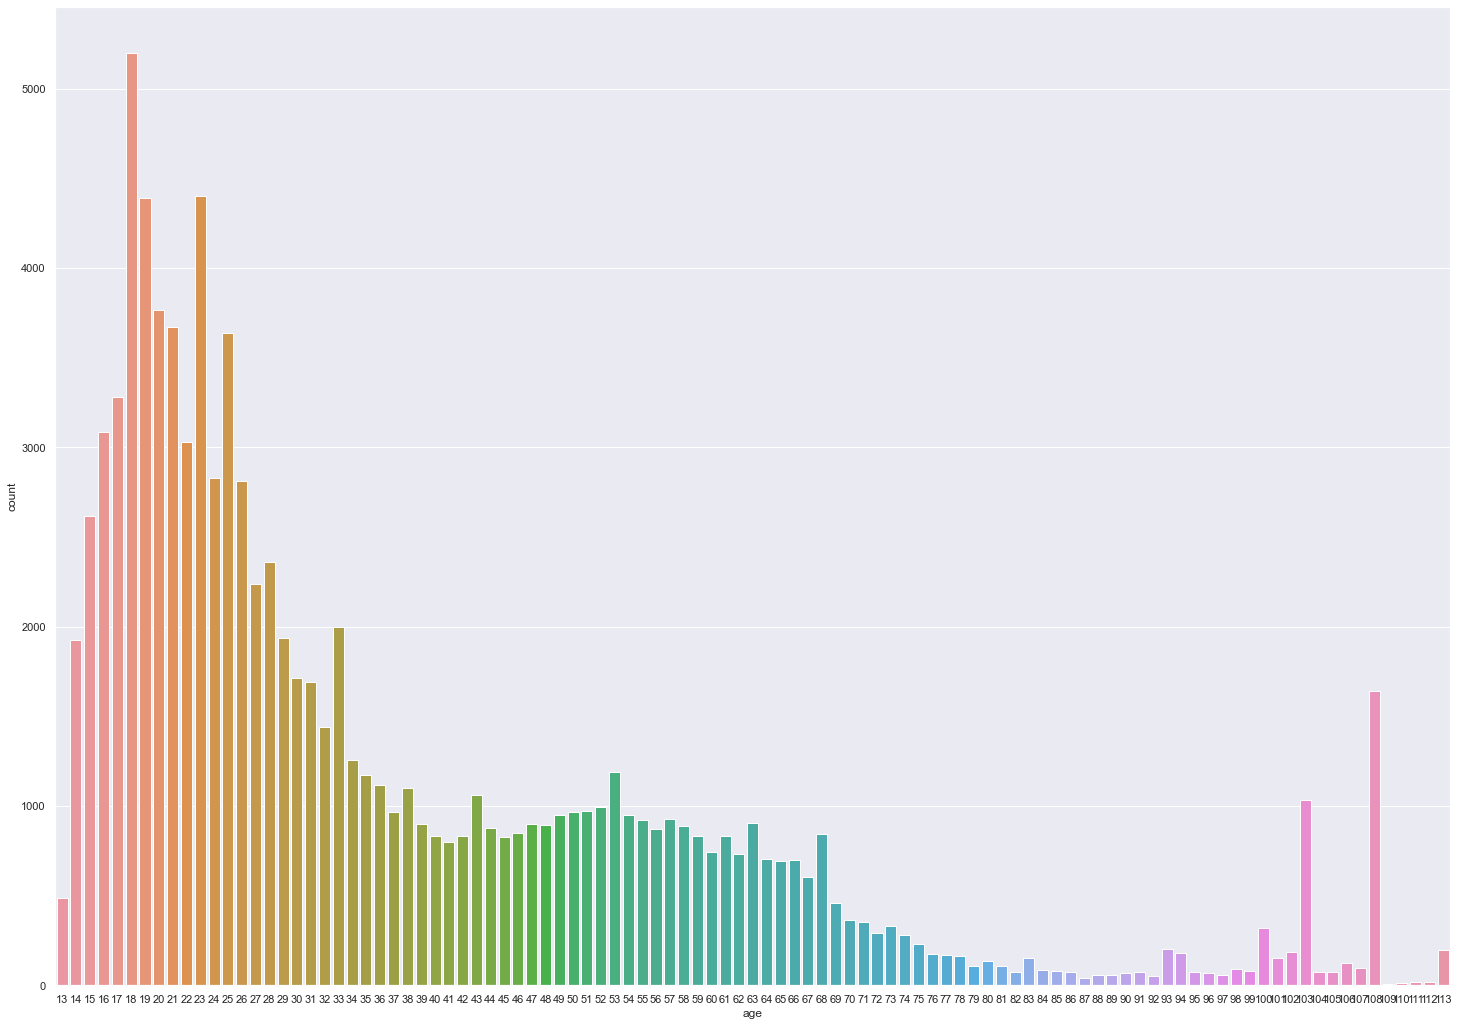

In [9]:
sns.set(rc = {'figure.figsize' :(25,18)})
sns.countplot(x = 'age', data = facebook_data)

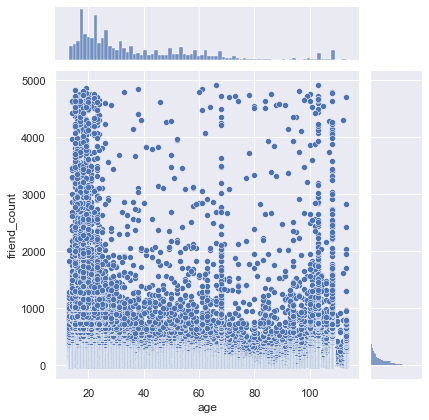

In [10]:
sns.set(rc = {'figure.figsize' :(25,11)})
sns.jointplot(x = 'age', y = 'friend_count', data = facebook_data)

<AxesSubplot:ylabel='gender'>

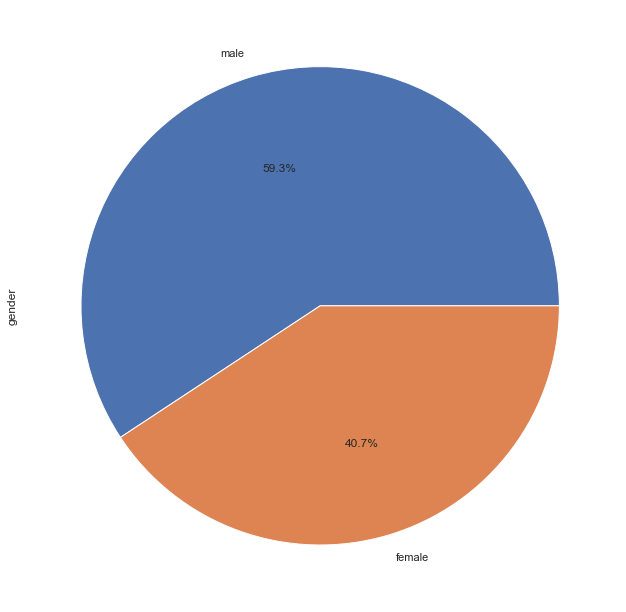

In [11]:
facebook_data['gender'].value_counts().plot(kind='pie', autopct = '%2.1f%%')

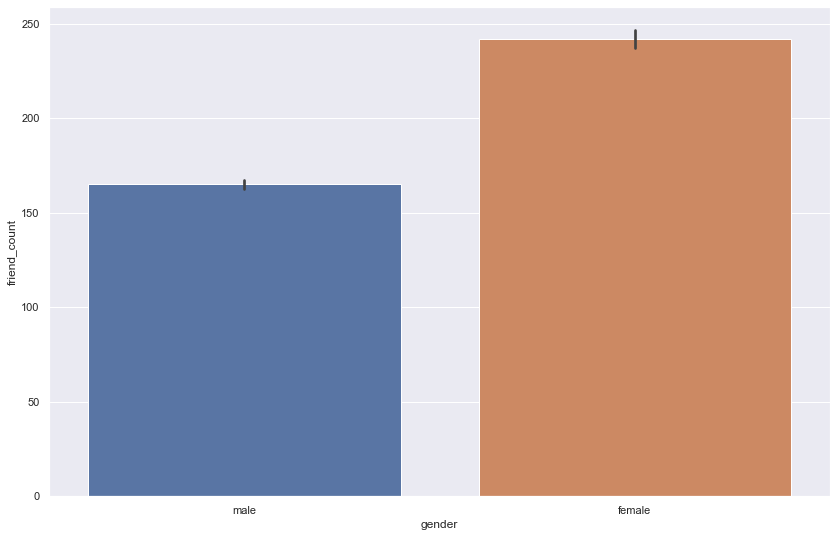

In [12]:
sns.set(rc = {'figure.figsize' :(14,9)})
sns.barplot(x = 'gender', y = 'friend_count', data = facebook_data)
plt.show()

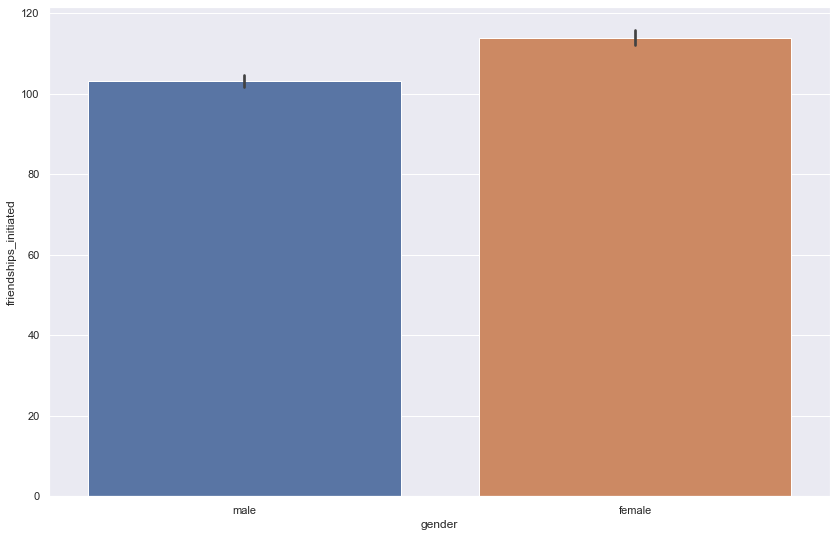

In [13]:
sns.set(rc = {'figure.figsize' :(14,9)})
sns.barplot(x = 'gender', y = 'friendships_initiated', data = facebook_data)
plt.show()

In [14]:
#create age groups 
bins = np.arange(10,121,10)
labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-110','111-119' ]

facebook_data ['age_group'] = pd.cut(facebook_data.age, bins = bins, labels = labels, right = False)
facebook_data.head()

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
1999-11-19,2094382,14,male,266.0,0,0,0,0,0,0,0,0,10-19
1999-11-02,1192601,14,female,6.0,0,0,0,0,0,0,0,0,10-19
1999-11-16,2083884,14,male,13.0,0,0,0,0,0,0,0,0,10-19
1999-12-25,1203168,14,female,93.0,0,0,0,0,0,0,0,0,10-19
1999-12-04,1733186,14,male,82.0,0,0,0,0,0,0,0,0,10-19


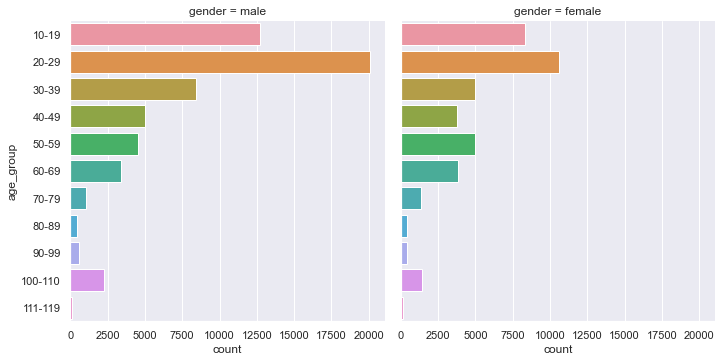

In [15]:
sns.set(rc = {'figure.figsize' :(14,9)})
sns.catplot(kind = 'count', y = 'age_group', data = facebook_data, col = 'gender')
plt.show()

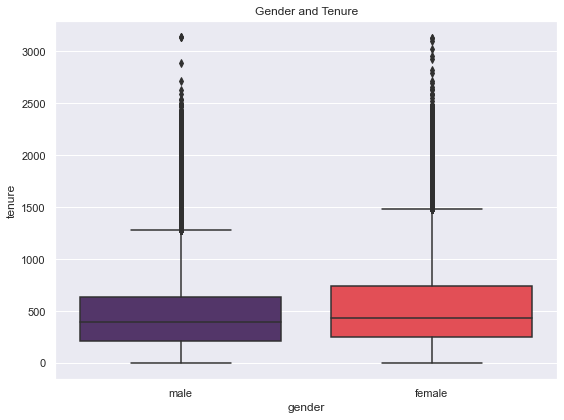

In [16]:
sns.set(rc = {'figure.figsize': (8,6)})
sns.boxplot(y = 'tenure', x = 'gender', data = facebook_data, palette = {'male': '#542e71', 'female': '#fb3640'})
plt.title('Gender and Tenure')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='age_group', ylabel='tenure'>

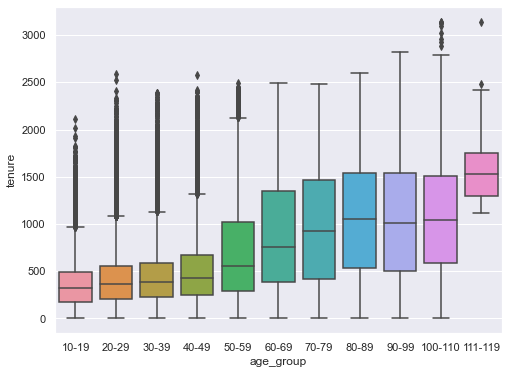

In [17]:
sns.boxplot(y = 'tenure', x = 'age_group', data = facebook_data)

<AxesSubplot:xlabel='gender'>

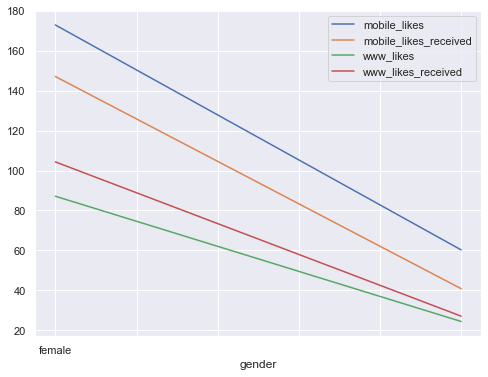

In [18]:
facebook_data.pivot_table(values = ['www_likes_received','www_likes','mobile_likes_received','mobile_likes'], index = 'gender').plot()

In [19]:
#calcualte pair-wise correlation for each variable
facebook_data.corr()

,userid,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,1.000000,-0.007206,-0.003400,-0.001479,-0.001807,-0.002972,0.001509,-0.005015,0.001749,0.001863,0.001040
age,-0.007206,1.000000,0.458675,-0.027754,-0.058432,-0.012821,-0.022612,-0.026541,-0.024253,0.015689,-0.018313
tenure,-0.003400,0.458675,1.000000,0.167604,0.134824,0.057696,0.027865,0.028453,0.024102,0.071244,0.030647
friend_count,-0.001479,-0.027754,0.167604,1.000000,0.825753,0.298096,0.236476,0.235717,0.232717,0.229798,0.220732
friendships_initiated,-0.001807,-0.058432,0.134824,0.825753,1.000000,0.285636,0.175118,0.229841,0.173804,0.213994,0.161405
likes,-0.002972,-0.012821,0.057696,0.298096,0.285636,1.000000,0.327144,0.871584,0.329048,0.644852,0.295442
likes_received,0.001509,-0.022612,0.027865,0.236476,0.175118,0.327144,1.000000,0.256779,0.973676,0.255164,0.947984
mobile_likes,-0.005015,-0.026541,0.028453,0.235717,0.229841,0.871584,0.256779,1.000000,0.288329,0.187344,0.189923
mobile_likes_received,0.001749,-0.024253,0.024102,0.232717,0.173804,0.329048,0.973676,0.288329,1.000000,0.209793,0.850473
www_likes,0.001863,0.015689,0.071244,0.229798,0.213994,0.644852,0.255164,0.187344,0.209793,1.000000,0.295874


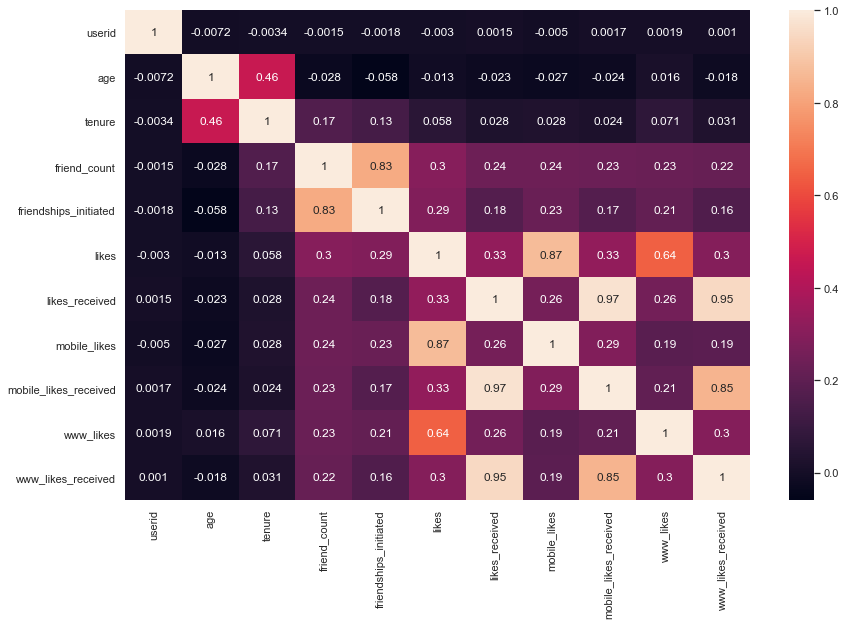

In [20]:
#correlation matrix between variables
plt.subplots(figsize = (14,9))
sns.heatmap(facebook_data.corr(), annot = True)
plt.show()

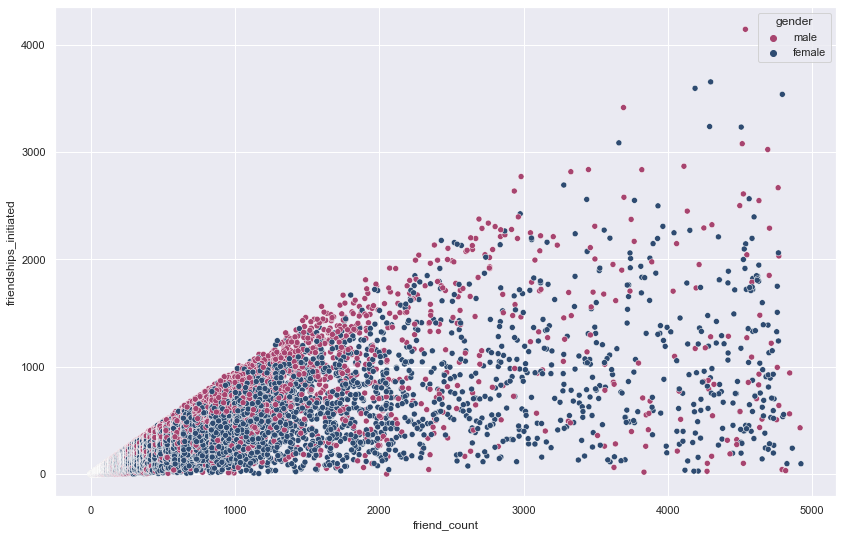

In [21]:
#correlation between counts of friends and initated friendships of user
fig, ax = plt.subplots(figsize = (14,9))
sns.scatterplot(ax = ax, x = 'friend_count', y = 'friendships_initiated', data = facebook_data, hue = 'gender', hue_order = ['male', 'female'], palette = {'male': '#A7446F', 'female': '#2E4B71'})
plt.show()